In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#Load healthcare practitioner data from drive
doctor = pd.read_csv('/content/drive/MyDrive/Data Journey/Datasets/West Java Data/Jumlah Tenaga Kesehatan di Puskesmas.csv')
doctor.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_nakes_puskesmas,jenis_kelamin,jumlah_nakes,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,DOKTER GIGI,LAKI-LAKI,5,ORANG,2018
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,DOKTER GIGI,PEREMPUAN,56,ORANG,2018
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,DOKTER GIGI SPESIALIS,LAKI-LAKI,0,ORANG,2018
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,DOKTER GIGI SPESIALIS,PEREMPUAN,0,ORANG,2018
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,DOKTER SPESIALIS,LAKI-LAKI,0,ORANG,2018


In [41]:
#Rename the column names into English
doctor.rename(columns={
    'id' : 'id',
    'kode_provinsi': 'prov_code',
    'nama_provinsi': 'prov_name',
    'kode_kabupaten_kota': 'regency_city_code',
    'nama_kabupaten_kota': 'regency_city_name',
    'kategori_nakes_puskesmas': 'category',
    'jenis_kelamin': 'gender',
    'jumlah_nakes': 'total_doctor',
    'satuan': 'unit',
    'tahun': 'year'
}, inplace=True)

doctor.head()

,id,prov_code,prov_name,regency_city_code,regency_city_name,category,gender,total_doctor,unit,year
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,DOKTER GIGI,LAKI-LAKI,5,ORANG,2018
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,DOKTER GIGI,PEREMPUAN,56,ORANG,2018
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,DOKTER GIGI SPESIALIS,LAKI-LAKI,0,ORANG,2018
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,DOKTER GIGI SPESIALIS,PEREMPUAN,0,ORANG,2018
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,DOKTER SPESIALIS,LAKI-LAKI,0,ORANG,2018


In [42]:
#Display each unique value for each column
for column in doctor:
  unique_values = doctor[column].unique()
  print(f"'{column}':'{unique_values}'")

'id':'[   1    2    3 ... 1078 1079 1080]'
'prov_code':'[32]'
'prov_name':'['JAWA BARAT']'
'regency_city_code':'[3201 3202 3203 3204 3205 3206 3207 3208 3209 3210 3211 3212 3213 3214
 3215 3216 3217 3218 3271 3272 3273 3274 3275 3276 3277 3278 3279]'
'regency_city_name':'['KABUPATEN BOGOR' 'KABUPATEN SUKABUMI' 'KABUPATEN CIANJUR'
 'KABUPATEN BANDUNG' 'KABUPATEN GARUT' 'KABUPATEN TASIKMALAYA'
 'KABUPATEN CIAMIS' 'KABUPATEN KUNINGAN' 'KABUPATEN CIREBON'
 'KABUPATEN MAJALENGKA' 'KABUPATEN SUMEDANG' 'KABUPATEN INDRAMAYU'
 'KABUPATEN SUBANG' 'KABUPATEN PURWAKARTA' 'KABUPATEN KARAWANG'
 'KABUPATEN BEKASI' 'KABUPATEN BANDUNG BARAT' 'KABUPATEN PANGANDARAN'
 'KOTA BOGOR' 'KOTA SUKABUMI' 'KOTA BANDUNG' 'KOTA CIREBON' 'KOTA BEKASI'
 'KOTA DEPOK' 'KOTA CIMAHI' 'KOTA TASIKMALAYA' 'KOTA BANJAR']'
'category':'['DOKTER GIGI' 'DOKTER GIGI SPESIALIS' 'DOKTER SPESIALIS' 'DOKTER UMUM']'
'gender':'['LAKI-LAKI' 'PEREMPUAN']'
'total_doctor':'[  5  56   0  71 136   8  13  39  53  27  35  47  61  48 111  19  7

In [43]:
#Replace values into English
doctor['prov_name'] = doctor['prov_name'].replace('JAWA BARAT', 'WEST JAVA')
doctor['category'] = doctor['category'].replace({'DOKTER GIGI' : 'Dentist',
                                                         'DOKTER GIGI SPESIALIS' : 'Specialist Dentist',
                                                         'DOKTER SPESIALIS' : 'Specialist Doctor',
                                                         'DOKTER UMUM' : 'General Practitioner'})
doctor['gender'] = doctor['gender'].replace({'LAKI-LAKI' : 'Male', 'PEREMPUAN' : 'Female'})
doctor['unit'] = doctor['unit'].replace('ORANG', 'People')
doctor.head()

,id,prov_code,prov_name,regency_city_code,regency_city_name,category,gender,total_doctor,unit,year
0,1,32,WEST JAVA,3201,KABUPATEN BOGOR,Dentist,Male,5,People,2018
1,2,32,WEST JAVA,3201,KABUPATEN BOGOR,Dentist,Female,56,People,2018
2,3,32,WEST JAVA,3201,KABUPATEN BOGOR,Specialist Dentist,Male,0,People,2018
3,4,32,WEST JAVA,3201,KABUPATEN BOGOR,Specialist Dentist,Female,0,People,2018
4,5,32,WEST JAVA,3201,KABUPATEN BOGOR,Specialist Doctor,Male,0,People,2018


In [44]:
#Create a new table group by regency/city name, year, and category
sum_cat = ['total_doctor']
grouped_doctor = doctor.groupby(['regency_city_name', 'year', 'category'])[sum_cat].sum().reset_index()
grouped_doctor.head()

,regency_city_name,year,category,total_doctor
0,KABUPATEN BANDUNG,2018,Dentist,74
1,KABUPATEN BANDUNG,2018,General Practitioner,159
2,KABUPATEN BANDUNG,2018,Specialist Dentist,0
3,KABUPATEN BANDUNG,2018,Specialist Doctor,0
4,KABUPATEN BANDUNG,2019,Dentist,74


In [45]:
#Create a new table group by regency/city name and year
sum_cat = ['total_doctor']
grouped_doctor_city = doctor.groupby(['regency_city_name', 'year'])[sum_cat].sum().reset_index()
grouped_doctor_city.head()

,regency_city_name,year,total_doctor
0,KABUPATEN BANDUNG,2018,233
1,KABUPATEN BANDUNG,2019,233
2,KABUPATEN BANDUNG,2020,256
3,KABUPATEN BANDUNG,2021,272
4,KABUPATEN BANDUNG,2022,262


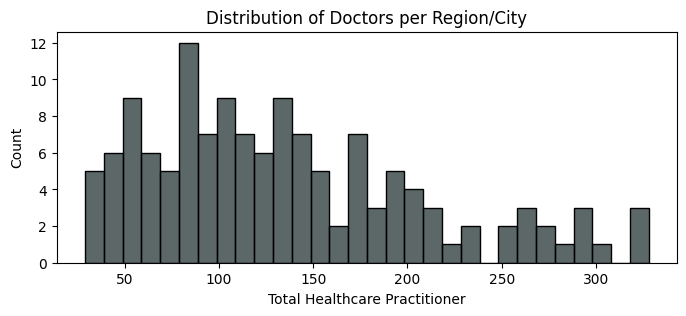

In [46]:
#Histogram of total doctor distribution
plt.figure(figsize=(8,3))
sns.histplot(grouped_doctor_city, x='total_doctor', bins=30, color='#253536')
plt.title('Distribution of Doctors per Region/City')
plt.xlabel('Total Healthcare Practitioner')
plt.show()

In [47]:
#Create a new table group by year and category
sum_cat = ['total_doctor']
grouped_doctor_year = doctor.groupby(['category','year'])[sum_cat].sum().reset_index()
grouped_doctor_year.head()

,category,year,total_doctor
0,Dentist,2018,859
1,Dentist,2019,859
2,Dentist,2020,948
3,Dentist,2021,986
4,Dentist,2022,1067


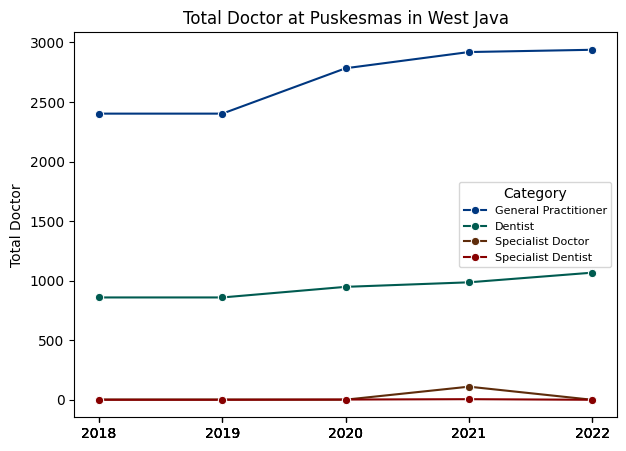

In [48]:
#Trendline of total doctor each year
custom_order = ['General Practitioner', 'Dentist', 'Specialist Doctor', 'Specialist Dentist']
doc_color={'General Practitioner' : '#003780',
           'Dentist' : '#005B50',
           'Specialist Doctor' : '#5E2C0B',
           'Specialist Dentist' : '#870000'}

plt.figure(figsize=(7,5))
sns.lineplot(grouped_doctor_year, x='year', y='total_doctor',
             hue='category',hue_order=custom_order ,
             marker='o', markers=True, palette=doc_color)
plt.xticks(grouped_doctor_year['year'])
plt.legend(title='Category', loc='best', fontsize=8)
plt.title('Total Doctor at Puskesmas in West Java')
plt.xlabel('')
plt.ylabel('Total Doctor')
plt.show()

In [49]:
#Custom table to count only general practitioner grouped by regency/city name
general_pract = grouped_doctor[grouped_doctor['category'] == 'General Practitioner']
general_pract.head()

,regency_city_name,year,category,total_doctor
1,KABUPATEN BANDUNG,2018,General Practitioner,159
5,KABUPATEN BANDUNG,2019,General Practitioner,159
9,KABUPATEN BANDUNG,2020,General Practitioner,178
13,KABUPATEN BANDUNG,2021,General Practitioner,199
17,KABUPATEN BANDUNG,2022,General Practitioner,190


In [50]:
#Custom table to count only dentist grouped by regency/city name
dentist = grouped_doctor[grouped_doctor['category'] == 'Dentist']
dentist.head()

,regency_city_name,year,category,total_doctor
0,KABUPATEN BANDUNG,2018,Dentist,74
4,KABUPATEN BANDUNG,2019,Dentist,74
8,KABUPATEN BANDUNG,2020,Dentist,78
12,KABUPATEN BANDUNG,2021,Dentist,73
16,KABUPATEN BANDUNG,2022,Dentist,72


In [51]:
#Custom table to count specialists grouped by regency/city name
specialist = grouped_doctor[grouped_doctor['category'].isin(['Specialist Doctor', 'Specialist Dentist'])]
specialist_sum = specialist.groupby(['regency_city_name', 'year']).agg(total_doctor=('total_doctor', 'sum')).reset_index()
specialist_sum['category']='Specialists'
specialist_sum.head()

,regency_city_name,year,total_doctor,category
0,KABUPATEN BANDUNG,2018,0,Specialists
1,KABUPATEN BANDUNG,2019,0,Specialists
2,KABUPATEN BANDUNG,2020,0,Specialists
3,KABUPATEN BANDUNG,2021,0,Specialists
4,KABUPATEN BANDUNG,2022,0,Specialists


In [52]:
#Load population data from drive
population = pd.read_csv('/content/drive/MyDrive/Data Journey/Datasets/West Java Data/Jumlah Penduduk Berdasarkan Jenis Kelamin dan Kabupaten Kota.csv')
population.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kelamin,jumlah_penduduk,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAKI-LAKI,1930902,JIWA,2013
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,PEREMPUAN,1826962,JIWA,2013
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,LAKI-LAKI,1258939,JIWA,2013
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PEREMPUAN,1171101,JIWA,2013
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,LAKI-LAKI,1154944,JIWA,2013


In [53]:
#Rename each column name
population.rename(columns={
    'id' : 'id',
    'kode_provinsi': 'prov_code',
    'nama_provinsi': 'prov_name',
    'kode_kabupaten_kota': 'regency_city_code',
    'nama_kabupaten_kota': 'regency_city_name',
    'jenis_kelamin': 'gender',
    'jumlah_penduduk': 'total_population',
    'satuan': 'unit',
    'tahun': 'year'
}, inplace=True)

population.head()

,id,prov_code,prov_name,regency_city_code,regency_city_name,gender,total_population,unit,year
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAKI-LAKI,1930902,JIWA,2013
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,PEREMPUAN,1826962,JIWA,2013
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,LAKI-LAKI,1258939,JIWA,2013
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PEREMPUAN,1171101,JIWA,2013
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,LAKI-LAKI,1154944,JIWA,2013


In [54]:
#Change values into English
population['prov_name'] = population['prov_name'].replace('JAWA BARAT', 'WEST JAVA')
population['gender'] = population['gender'].replace({'LAKI-LAKI' : 'Male', 'PEREMPUAN' : 'Female'})
population['unit'] = population['unit'].replace('JIWA', 'People')
population.head()

,id,prov_code,prov_name,regency_city_code,regency_city_name,gender,total_population,unit,year
0,1,32,WEST JAVA,3201,KABUPATEN BOGOR,Male,1930902,People,2013
1,2,32,WEST JAVA,3201,KABUPATEN BOGOR,Female,1826962,People,2013
2,3,32,WEST JAVA,3202,KABUPATEN SUKABUMI,Male,1258939,People,2013
3,4,32,WEST JAVA,3202,KABUPATEN SUKABUMI,Female,1171101,People,2013
4,5,32,WEST JAVA,3203,KABUPATEN CIANJUR,Male,1154944,People,2013


In [55]:
#New table to count the total population grouped by regency/city name and year
grouped_population = population.groupby(['regency_city_name', 'year']).sum().reset_index()
grouped_population.head()

<ipython-input-55-9b70739beea5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_population = population.groupby(['regency_city_name', 'year']).sum().reset_index()


,regency_city_name,year,id,prov_code,regency_city_code,total_population
0,KABUPATEN BANDUNG,2013,15,64,6408,3476420
1,KABUPATEN BANDUNG,2014,123,64,6408,3492356
2,KABUPATEN BANDUNG,2015,231,64,6408,3494469
3,KABUPATEN BANDUNG,2016,339,64,6408,3512189
4,KABUPATEN BANDUNG,2017,447,64,6408,3525149


In [56]:
#New table to count the total doctor grouped by regency/city name and year
doc_pop = pd.merge(grouped_doctor_city, grouped_population, on=('regency_city_name', 'year'))
doc_pop = doc_pop.drop(columns=['id','prov_code','regency_city_code'])
doc_pop.head()

,regency_city_name,year,total_doctor,total_population
0,KABUPATEN BANDUNG,2018,233,3535992
1,KABUPATEN BANDUNG,2019,233,3561679
2,KABUPATEN BANDUNG,2020,256,3583056
3,KABUPATEN BANDUNG,2021,272,3633437
4,KABUPATEN BANDUNG,2022,262,3708344


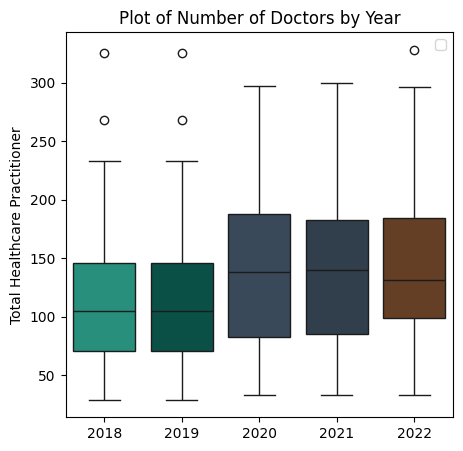

In [57]:
#Boxplot of doctor each year
year_color={2018 : '#16A085',
            2019 : '#005B50',
            2020 : '#34495E',
            2021 : '#2C3E50',
            2022 : '#6E3C1B'}

plt.figure(figsize=(5,5))
sns.boxplot(doc_pop, x='year', y='total_doctor', hue='year', palette=year_color)
plt.title('Plot of Number of Doctors by Year')
plt.xlabel('')
plt.ylabel('Total Healthcare Practitioner')
plt.legend('')
plt.show()

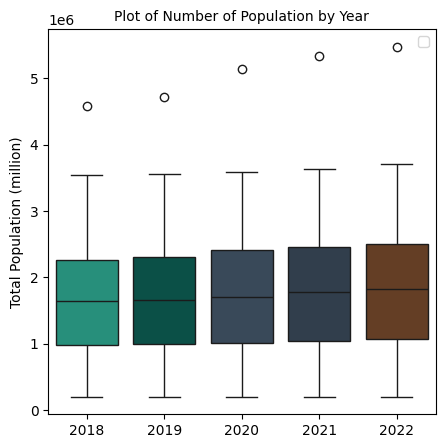

In [58]:
#Boxplot of popoulation each year
plt.figure(figsize=(5,5))
sns.boxplot(doc_pop, x='year', y='total_population', hue='year', palette=year_color)
plt.title('Plot of Number of Population by Year', fontsize=10)
plt.xlabel('')
plt.ylabel('Total Population (million)')
plt.legend('')
plt.show()

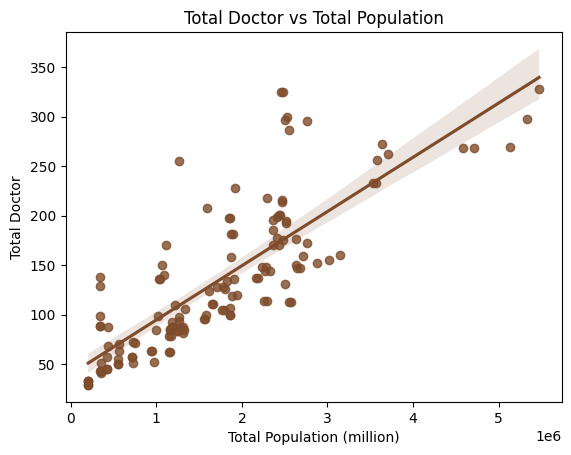

In [59]:
#Comparison between total doctor and total popoulation
sns.regplot(doc_pop, x='total_population', y='total_doctor', color='#7E4C2B')
plt.title('Total Doctor vs Total Population')
plt.xlabel('Total Population (million)')
plt.ylabel('Total Doctor')
plt.show()

In [60]:
#New table to count the ratio of general practitioner per number of population
gen_pract_ratio = pd.merge(general_pract, grouped_population, on=('year','regency_city_name'))
gen_pract_ratio = gen_pract_ratio.drop(columns=['id', 'prov_code', 'regency_city_code'])
gen_pract_ratio['ratio'] = (gen_pract_ratio['total_population']/gen_pract_ratio['total_doctor']).round(0)
gen_pract_ratio.head()

,regency_city_name,year,category,total_doctor,total_population,ratio
0,KABUPATEN BANDUNG,2018,General Practitioner,159,3535992,22239.0
1,KABUPATEN BANDUNG,2019,General Practitioner,159,3561679,22400.0
2,KABUPATEN BANDUNG,2020,General Practitioner,178,3583056,20130.0
3,KABUPATEN BANDUNG,2021,General Practitioner,199,3633437,18258.0
4,KABUPATEN BANDUNG,2022,General Practitioner,190,3708344,19518.0


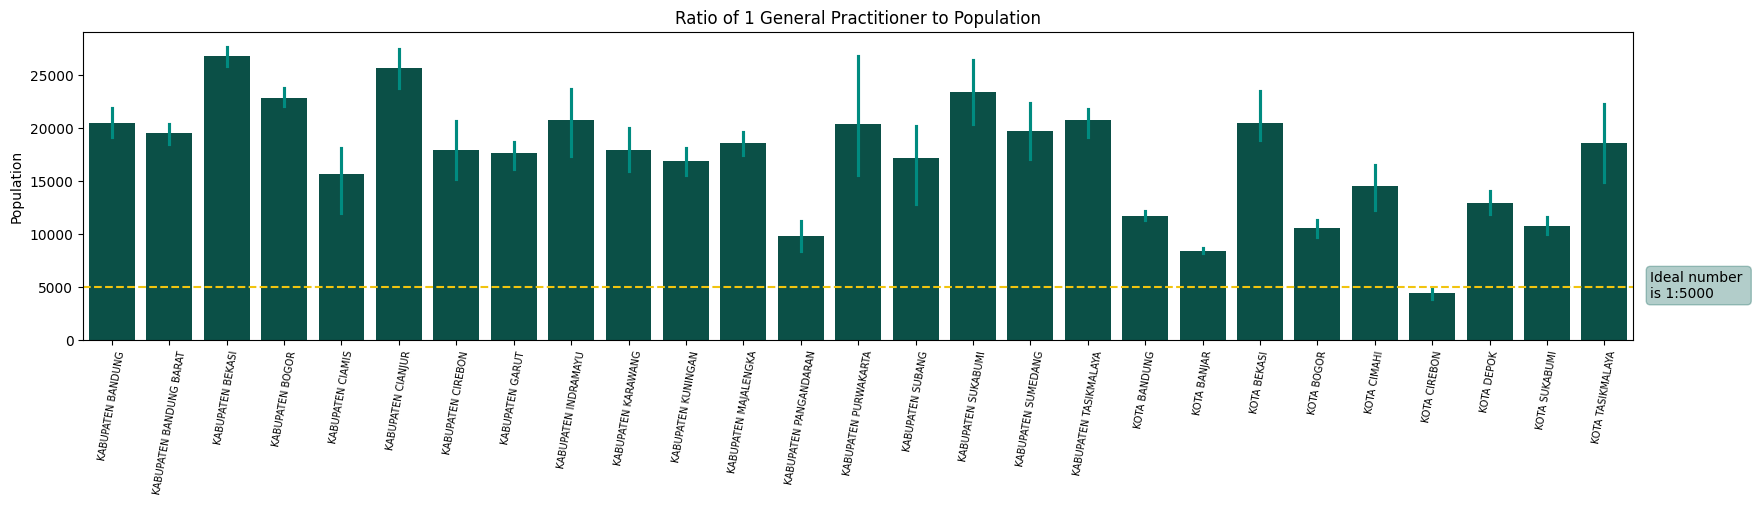

In [61]:
#Bar chart of general practitioner by regency/city name
plt.figure(figsize=(20,4))
sns.barplot(gen_pract_ratio, x='regency_city_name', y='ratio', color='#005B50', err_kws={'color':'#008B80'})
plt.title('Ratio of 1 General Practitioner to Population')
plt.axhline(y=5000, linestyle='--', color='#F1C40F')
plt.xticks(rotation=80, fontsize=7)
plt.xlabel('')
plt.ylabel('Population')
plt.text(26.8, 4000, 'Ideal number \nis 1:5000', color='black', fontsize=10, ha='left', bbox=dict(color='#005B50', alpha=.3, boxstyle='round,pad=0.3'))
plt.show()

In [62]:
#New table to count the ratio of dentist per number of population
dentist_ratio = pd.merge(dentist, grouped_population, on=('year', 'regency_city_name'))
dentist_ratio = dentist_ratio.drop(columns=['id', 'prov_code', 'regency_city_code'])
dentist_ratio['ratio'] = (dentist_ratio['total_population'] / dentist_ratio['total_doctor']).round(0)
dentist_ratio.head()

,regency_city_name,year,category,total_doctor,total_population,ratio
0,KABUPATEN BANDUNG,2018,Dentist,74,3535992,47784.0
1,KABUPATEN BANDUNG,2019,Dentist,74,3561679,48131.0
2,KABUPATEN BANDUNG,2020,Dentist,78,3583056,45937.0
3,KABUPATEN BANDUNG,2021,Dentist,73,3633437,49773.0
4,KABUPATEN BANDUNG,2022,Dentist,72,3708344,51505.0


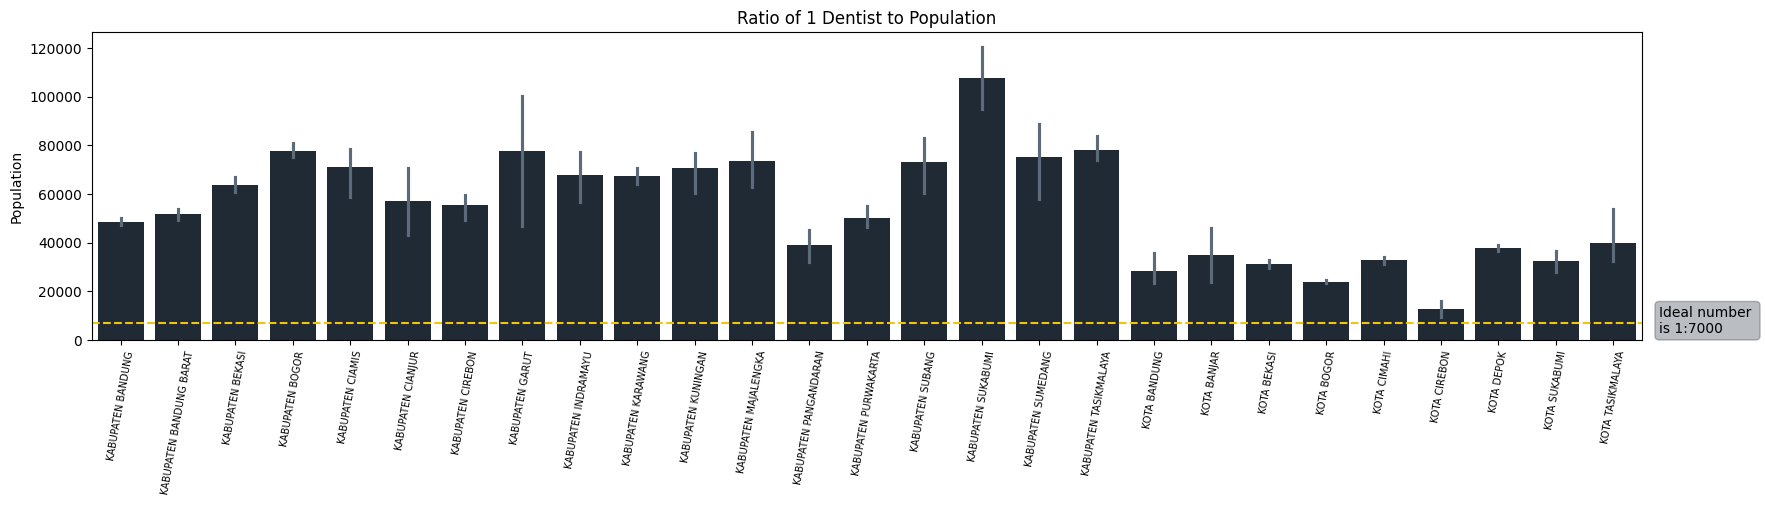

In [63]:
#Bar chart of dentist by regency/city name
plt.figure(figsize=(20,4))
sns.barplot(dentist_ratio, x='regency_city_name', y='ratio', color='#1C2A39', err_kws={'color':'#5C6A79'})
plt.title('Ratio of 1 Dentist to Population')
plt.axhline(y=7000, linestyle='--', color='#F1C40F')
plt.xticks(rotation=80, fontsize=7)
plt.xlabel('')
plt.ylabel('Population')
plt.text(26.8, 3000, 'Ideal number \nis 1:7000', color='black', fontsize=10, ha='left', bbox=dict(color='#1C2A39', alpha=.3, boxstyle='round,pad=0.3'))
plt.show()

In [64]:
#New table to count the ratio of specialists per number of population
specialist_ratio = pd.merge(specialist_sum, grouped_population, on=('year','regency_city_name'))
specialist_ratio = specialist_ratio.drop(columns=['id', 'prov_code', 'regency_city_code'])
specialist_ratio['ratio'] = (specialist_ratio['total_population']/specialist_ratio['total_doctor']).round(0)
specialist_ratio['ratio'] = specialist_ratio['ratio'].replace([float('inf')], 0)
specialist_ratio.head()

,regency_city_name,year,total_doctor,category,total_population,ratio
0,KABUPATEN BANDUNG,2018,0,Specialists,3535992,0.0
1,KABUPATEN BANDUNG,2019,0,Specialists,3561679,0.0
2,KABUPATEN BANDUNG,2020,0,Specialists,3583056,0.0
3,KABUPATEN BANDUNG,2021,0,Specialists,3633437,0.0
4,KABUPATEN BANDUNG,2022,0,Specialists,3708344,0.0


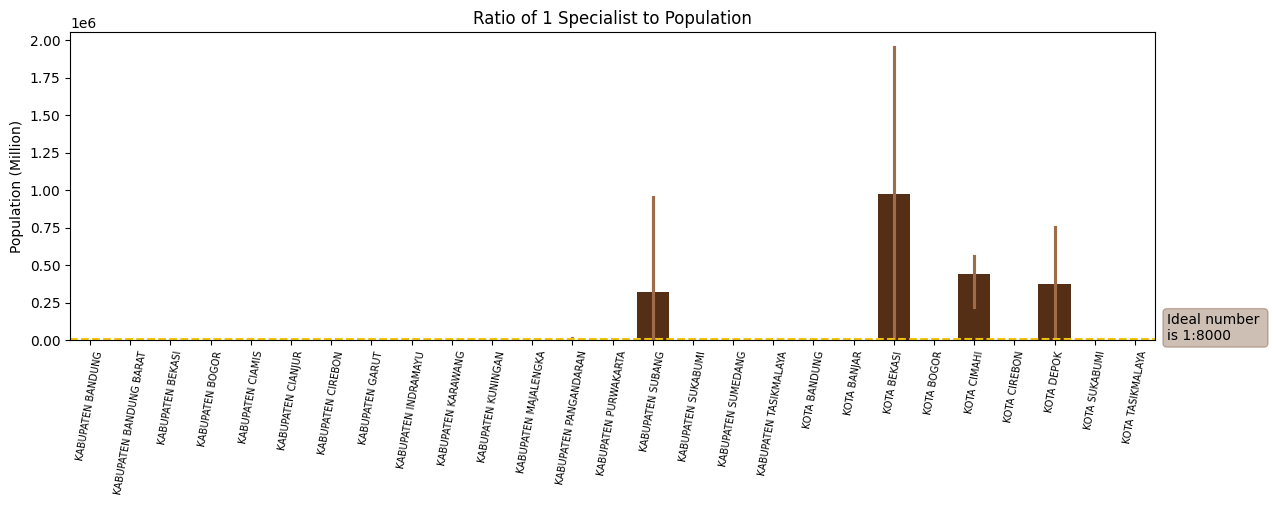

In [65]:
#Bar chart of specialists by regency/city name
plt.figure(figsize=(14,4))
sns.barplot(specialist_ratio, x='regency_city_name', y='ratio', color='#5E2C0B', err_kws={'color':'#9E6C4B'})
plt.title('Ratio of 1 Specialist to Population')
plt.axhline(y=8000, linestyle='--', color='#F1C40F')
plt.xticks(rotation=80, fontsize=7)
plt.xlabel('')
plt.ylabel('Population (Million)')
plt.text(26.8, 1000, 'Ideal number \nis 1:8000', color='black', fontsize=10, ha='left', bbox=dict(color='#5E2C0B', alpha=.3, boxstyle='round,pad=0.3'))
plt.show()

In [66]:
#Pivot table to count the correlation matrix
pivot_doctor = pd.pivot_table(doctor,
                              index='regency_city_name',
                              columns='category',
                              values='total_doctor')
pivot_doctor.reset_index(inplace=True)
pivot_doctor.head()

category,regency_city_name,Dentist,General Practitioner,Specialist Dentist,Specialist Doctor
0,KABUPATEN BANDUNG,37.1,88.5,0.0,0.0
1,KABUPATEN BANDUNG BARAT,16.7,44.5,0.0,0.0
2,KABUPATEN BEKASI,22.5,53.6,0.0,0.0
3,KABUPATEN BOGOR,32.5,110.6,0.0,0.0
4,KABUPATEN CIAMIS,9.2,43.1,0.0,9.0


In [67]:
#Correlation matrix table of doctors
pivot_doctor_corr = pivot_doctor.corr(numeric_only=True).round(3)
pivot_doctor_corr.head()

category,Dentist,General Practitioner,Specialist Dentist,Specialist Doctor
category,,,,
Dentist,1.000,0.868,-0.001,-0.190
General Practitioner,0.868,1.000,0.072,-0.105
Specialist Dentist,-0.001,0.072,1.000,0.021
Specialist Doctor,-0.190,-0.105,0.021,1.000


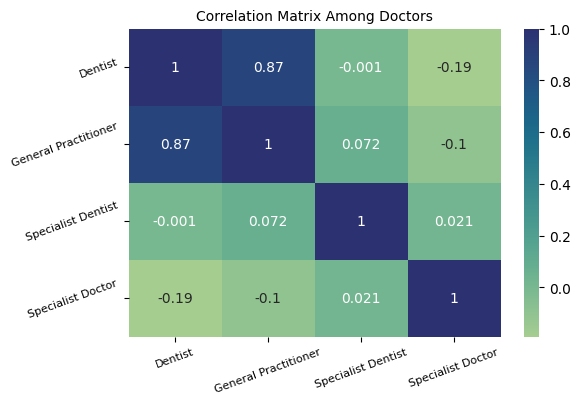

In [68]:
#Correlation matrix among doctors
plt.figure(figsize=(6,4))
sns.heatmap(pivot_doctor_corr, annot=True, cmap='crest')
plt.title('Correlation Matrix Among Doctors', fontsize=10)
plt.xticks(rotation=20,fontsize=8)
plt.yticks(rotation=20,fontsize=8)
plt.xlabel('')
plt.ylabel('')
plt.show()